In [40]:
# TensorFlow and tf.keras
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

import os
import cv2

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import RMSprop
from keras.utils import np_utils

In [2]:
print tf.__version__

1.1.0


In [50]:
print keras.__version__

2.2.0


In [3]:
os.listdir("./data")

['.DS_Store',
 'sample_submission_I5njJSF.csv',
 'test_ScVgIM0',
 'test_ScVgIM0.zip',
 'train_LbELtWX',
 'train_LbELtWX.zip']

In [4]:
os.listdir("./data/train_LbELtWX")

['.DS_Store', 'train', 'train.csv']

In [5]:
os.listdir("./data/test_ScVgIM0")

['.DS_Store', 'test', 'test.csv']

In [6]:
train_base_path = "./data/train_LbELtWX/train/"
test_base_path = "./data/test_ScVgIM0/test/"

In [24]:
train_label_df = pd.read_csv("./data/train_LbELtWX/train.csv")

In [7]:
def get_image_path(base_path):
    img_files = [i for i in os.listdir(base_path)]
    return img_files

In [8]:
test_image_files = get_image_path(test_base_path)
print len(test_image_files)
test_image_files[:3]

10000


['60001.png', '60002.png', '60003.png']

In [9]:
train_image_files = get_image_path(train_base_path)
print len(train_image_files)
train_image_files[:3]

60000


['1.png', '10.png', '100.png']

In [379]:
len(train_image_files)

60000

In [10]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return img

In [13]:
def show_image(file_path):
    plt.imshow(read_image(file_path), cmap="gray")

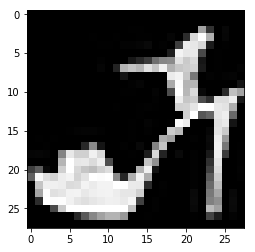

In [14]:
show_image(train_base_path + train_image_files[1])

In [15]:
# show_images(train_image_files[1])
# show_images(test_image_files[10])
# show_images(train_image_files[104])

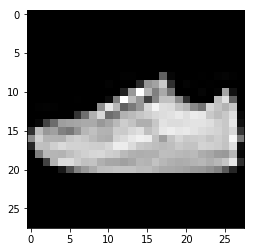

In [17]:
show_image(test_base_path + test_image_files[104])

In [19]:
int("1.png".split(".")[0])

1

In [23]:
def display_image(img, label):
    print "label: ", label
    plt.imshow(img)

In [25]:
id_label_dict = dict(zip(train_label_df["id"], train_label_df["label"]))

In [27]:
def get_image_data(image_files, base_path):
    labels = []
    image_mat = np.zeros([len(image_files),28, 28])  
    for idx in range(len(image_files)):
        image_mat[idx] = read_image(base_path + image_files[idx])
        labels.append(id_label_dict[int(image_files[idx].split(".")[0])])
    return image_mat, labels
#     return labels

In [57]:
train_img, train_labels =  get_image_data(train_image_files, train_base_path)

In [31]:
# train_labels =  get_image_data(train_image_files, train_base_path)

In [58]:
train_img.shape, len(train_labels)

((60000, 28, 28), 60000)

In [59]:
# train_image_files

In [60]:
label_dict = {
0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"
}

In [34]:
i =0

label:  Ankle boot


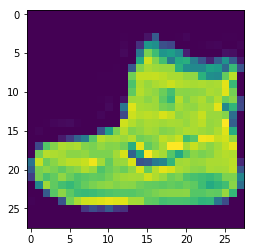

In [35]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Sandal


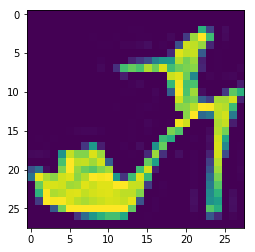

In [36]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Bag


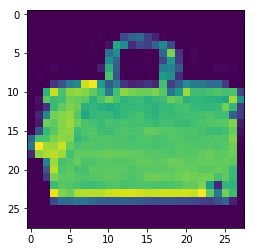

In [422]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Bag


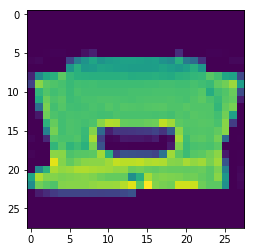

In [423]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Shirt


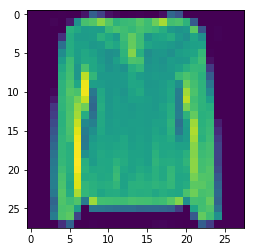

In [424]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Bag


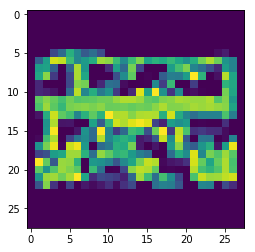

In [425]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Sneaker


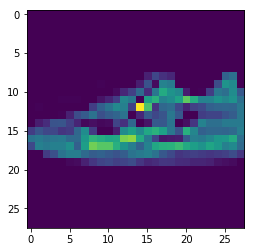

In [426]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Shirt


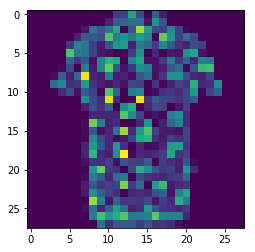

In [427]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Bag


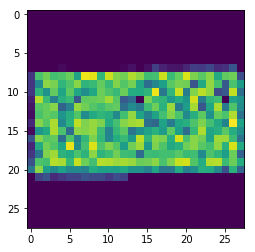

In [428]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Sneaker


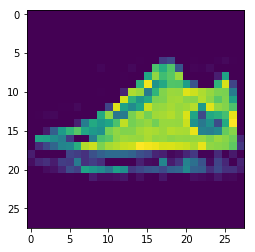

In [429]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

In [431]:
# test_img =  get_image_data(test_image_files[:50], test_base_path)

In [246]:
test_img.shape

(50, 28, 28)

In [247]:
train_img[0].shape

(28, 28)

In [291]:
train_labels["label"].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [447]:
len(train_labels)

60020

In [434]:
num_classes = 10
print num_classes

10


In [61]:
X_train = train_img
# X_test = test_img

In [62]:
X_train = X_train.astype('float32')/255
# X_test = X_test.astype('float32')/225

In [63]:
# train_labels["label"]

In [64]:
y_train = np_utils.to_categorical(train_labels)

In [65]:
y_train.shape

(60000, 10)

In [66]:
y_train.shape

(60000, 10)

In [67]:
y_train[[67]]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [68]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.reshape(-1,28,28,1)
# X_test = X_test.reshape(-1,28,28,1)

In [69]:
X_train.shape

(60000, 28, 28, 1)

## Model

In [70]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation=tf.nn.softmax))

In [49]:
# model = Sequential()
# # Must define the input shape in the first layer of the neural network
# model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.3))
# model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))
# # Take a look at the model summary
# model.summary()

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)          102464    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               131200    
__________

In [72]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [73]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [474]:
# learning_rate_reduction = 

In [74]:
epochs = 30
batch_size = 64

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 139s 3ms/step - loss: 0.5542 - acc: 0.7965 - val_loss: 0.3567 - val_acc: 0.8731
Epoch 2/30
48000/48000 [==============================] - 144s 3ms/step - loss: 0.3443 - acc: 0.8744 - val_loss: 0.3174 - val_acc: 0.8821
Epoch 3/30
48000/48000 [==============================] - 134s 3ms/step - loss: 0.2953 - acc: 0.8933 - val_loss: 0.2783 - val_acc: 0.8989
Epoch 4/30
48000/48000 [==============================] - 128s 3ms/step - loss: 0.2668 - acc: 0.9019 - val_loss: 0.3080 - val_acc: 0.8908
Epoch 5/30
48000/48000 [==============================] - 128s 3ms/step - loss: 0.2490 - acc: 0.9084 - val_loss: 0.2769 - val_acc: 0.8931
Epoch 6/30
48000/48000 [==============================] - 129s 3ms/step - loss: 0.2331 - acc: 0.9143 - val_loss: 0.2692 - val_acc: 0.9024
Epoch 7/30
48000/48000 [==============================] - 129s 3ms/step - loss: 0.2184 - acc: 0.9196 - val_loss: 0.2703 - 

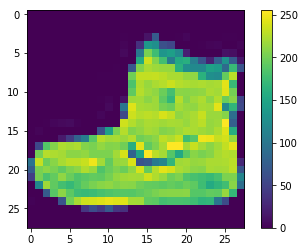

In [477]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.gca().grid(False)


In [478]:
results = model.predict(X_test)

In [493]:
train_results = model.predict(X_train)

In [479]:
results = np.argmax(results,axis = 1)

In [496]:
train_pred = np.argmax(train_results,axis = 1)

In [487]:
label_dict[5]

'Sandal'

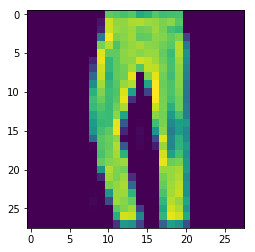

In [492]:
show_image(test_base_path + test_image_files[5])
# display_image(X_test[0], )

In [336]:
train_labels[train_labels["label"]==4]["id"][:10]

19      20
22      23
24      25
28      29
29      30
68      69
75      76
76      77
96      97
117    118
Name: id, dtype: int64

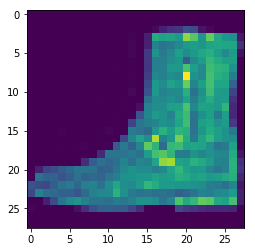

In [337]:
show_image(train_image_files[20])

In [506]:
train_results[0]

array([ 593.51763916,  545.98498535, -642.97625732,  529.8013916 ,
        595.12872314,  716.1583252 , -569.58099365, -616.03979492,
       -601.06176758, -567.22229004], dtype=float32)

In [498]:
set(train_pred)

{0, 5}